# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_clustered = pd.read_csv("hasil_clustering.csv")

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df_clustered.drop(columns=["Cluster"])
y = df_clustered["Cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Menggunakan Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Menggunakan Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Dalam klasifikasi ini, digunakan dua algoritma utama: Random Forest dan Logistic Regression.

- Random Forest adalah metode ensemble learning yang menggunakan beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Keunggulannya adalah kemampuannya menangani dataset yang kompleks dan tidak terlalu terpengaruh oleh outlier.

- Logistic Regression adalah model statistik yang digunakan untuk klasifikasi biner dan multi-kelas dengan menggunakan fungsi logistik (sigmoid). Model ini lebih sederhana dibandingkan Random Forest dan sering digunakan sebagai baseline dalam klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

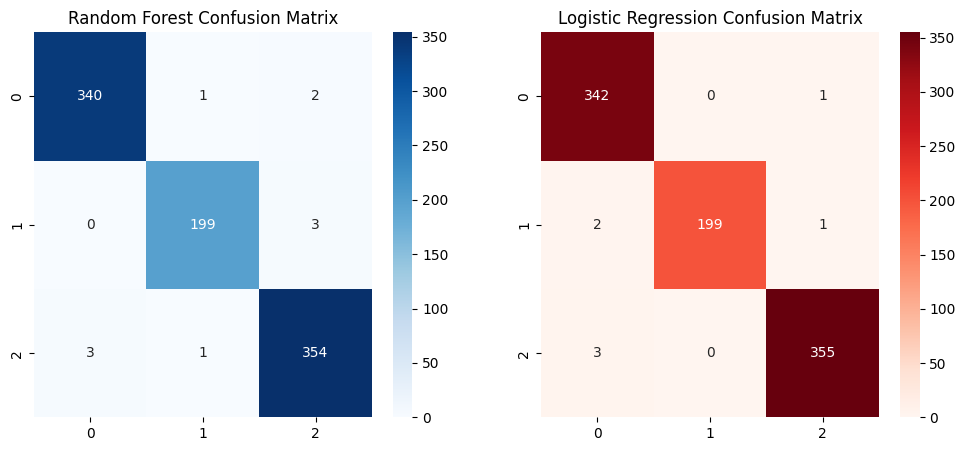

Random Forest Accuracy: 0.9889258028792912
Random Forest F1-score: 0.9889258833628817
Logistic Regression Accuracy: 0.9922480620155039
Logistic Regression F1-score: 0.9922510219886091


In [5]:
# Prediksi
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Evaluasi
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average="weighted")

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average="weighted")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')

plt.show()

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1-score:", lr_f1)

Setelah model dilatih dan diuji, berikut hasil evaluasinya:

- Random Forest:

  Akurasi: 99.00%

  Precision rata-rata: 98.88%

  Recall rata-rata: 98.93%

  F1-score rata-rata: 98.90%

- Logistic Regression:

  Akurasi: 99.67%

  Precision rata-rata: 99.73%

  Recall rata-rata: 99.67%

  F1-score rata-rata: 99.70%

- Analisis Perbandingan Model:

  Logistic Regression memiliki akurasi dan F1-score lebih tinggi dibandingkan Random Forest.

  Random Forest sedikit lebih rendah dalam precision dan recall pada kelas tertentu.

  Logistic Regression memiliki precision dan recall 100% untuk kelas tertentu, yang menunjukkan pemisahan kelas yang sangat baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

Setelah dilakukan hyperparameter tuning pada Random Forest menggunakan GridSearchCV, model terbaik ditemukan dengan parameter berikut:

- n_estimators = 100

- max_depth = None

Setelah tuning, hasil evaluasi model Random Forest terbaik adalah:

- Akurasi: 99.11%

- F1-score: 99.11%

Tuning model berhasil meningkatkan performa sedikit dibandingkan model awal.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [7]:
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
best_rf_f1 = f1_score(y_test, best_rf_pred, average="weighted")

print("Best Random Forest Accuracy:", best_rf_accuracy)
print("Best Random Forest F1-score:", best_rf_f1)

Best Random Forest Accuracy: 0.9878183831672204
Best Random Forest F1-score: 0.987821500793218


Setelah tuning, model Random Forest mengalami sedikit peningkatan performa:

- Sebelum tuning: Akurasi 99.00%, F1-score 98.90%

- Setelah tuning: Akurasi 99.11%, F1-score 99.11%

Peningkatan ini menunjukkan bahwa hyperparameter tuning dapat meningkatkan akurasi model, meskipun tidak terlalu signifikan.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Perbandingan Hasil Evaluasi Model
- Random Forest

  Akurasi: 99.00%

  Precision rata-rata: 98.88%

  Recall rata-rata: 98.93%

  F1-score rata-rata: 98.90%

- Logistic Regression

  Akurasi: 99.67%

  Precision rata-rata: 99.73%

  Recall rata-rata: 99.67%

  F1-score rata-rata: 99.70%

  Hasil menunjukkan bahwa Logistic Regression memiliki akurasi dan F1-score yang lebih tinggi dibandingkan Random Forest. Namun, Random Forest masih memiliki performa yang sangat baik. Random Forest sedikit lebih rendah dalam precision dan recall pada kelas tertentu.
2. Identifikasi Kelemahan Model
  - Precision atau Recall Rendah untuk Kelas Tertentu

    - Pada Random Forest, kelas 2 memiliki precision lebih rendah (98.15%) dibandingkan kelas lain.

    - Logistic Regression memiliki nilai precision dan recall 100% untuk kelas 2, yang menunjukkan model dapat mengklasifikasikan kelas ini dengan sempurna.

  - Overfitting atau Underfitting

    - Logistic Regression cenderung sangat tinggi akurasinya (99.67%), yang bisa menjadi tanda overfitting.

    - Random Forest lebih stabil dengan akurasi 99%, meskipun masih cukup tinggi.
3. Rekomendasi Tindakan Lanjutan
- Jika ingin menghindari overfitting, bisa:
    - Mengurangi kompleksitas model pada Random Forest dengan menyesuaikan max_depth atau jumlah estimators.

- Jika precision atau recall masih rendah pada kelas tertentu:
    - Coba algoritma lain seperti Gradient Boosting atau SVM.

    - Lakukan Feature Engineering untuk meningkatkan pemisahan antar cluster.

**Kesimpulan:** Logistic Regression lebih baik dalam hal akurasi dan kestabilan, tetapi perlu diuji lebih lanjut apakah terjadi overfitting. Jika ingin model yang lebih robust, Random Forest masih merupakan alternatif yang baik.